In [1]:
import cobra
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
sys.path.append('../../../code/')
import leakage
import utils
import FBA_leak
from pathlib import Path

# E. coli iJO1366 dynamic pFBA

In [2]:
# model = cobra.io.read_sbml_model('../../../models/e_coli/iJR904.xml')
# model = cobra.io.read_sbml_model('../../../models/e_coli/momentiJO1366.xml')
model = cobra.io.read_sbml_model('../../../models/e_coli/iJO1366.xml')

model.reactions.DHAPT.knock_out()
model.reactions.THRA.knock_out()
model.reactions.THRA2.knock_out()
# model.reactions.F6PA_TG_forward.knock_out()
model.reactions.F6PA.bounds = (-1000,0)



# model = cobra.io.read_sbml_model('../models/e_coli/e_coli_core.xml')
model.solver = 'gurobi'
# Initial conditions is 0.013 gDW/L (in total)
model_name = 'Ecoli'
model_name_dict = {model_name: [model, 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 20)
D1 = FBA_leak.dFBA(iterations = 200, dt = 0.1, method = "pFBA", store_exchanges_flag = False, pfba_fraction = 0.95)
D1.add_models(model_name_dict)
# Set Km and vMax
D1.models[model_name].set_km("glc__D_e", 1)
D1.models[model_name].set_Vmax("glc__D_e", 10)
# D1.models[model_name].set_Vmax("o2_e", 100)



D1.medium.define_initial_conditions({"glc__D_e": glucose_mM})
# D.medium.set_store_concentrations(["glc__D_e", "nh3_e"])
D1.run()
print(D1.biomass_df)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-26
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpf6ecnp5p.lp
Reading time = 0.01 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
dFBA simulation took 7 seconds
     Timepoint  Time      Ecoli
0            0   0.0   0.006000
1            1   0.1   0.006581
2            2   0.2   0.007219
3            3   0.3   0.007919
4            4   0.4   0.008686
..         ...   ...        ...
194        194  19.4  10.379501
195        195  19.5  10.379501
196        196  19.6  10.379501
197        197  19.7  10.379501
198        198  19.8  10.379501

[199 rows x 3 columns]


In [3]:
df = D1.medium.get_concentrations_df()
df

,ac_e,btn_e,ca2_e,cl_e,co2_e,cobalt2_e,cu2_e,fe2_e,fe3_e,glc__D_e,...,mobd_e,na1_e,nh4_e,ni2_e,o2_e,pi_e,so4_e,zn2_e,Timepoint,Time
0,0.000000,1000.0,1000.0,1000.0,0.000000,1000.0,1000.0,1000.0,1000.0,111.014972,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0,0.0
1,0.000371,1000.0,1000.0,1000.0,0.012664,1000.0,1000.0,1000.0,1000.0,111.008375,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1,0.1
2,0.000779,1000.0,1000.0,1000.0,0.026556,1000.0,1000.0,1000.0,1000.0,111.001138,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,2,0.2
3,0.001226,1000.0,1000.0,1000.0,0.041793,1000.0,1000.0,1000.0,1000.0,110.993201,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,3,0.3
4,0.001716,1000.0,1000.0,1000.0,0.058508,1000.0,1000.0,1000.0,1000.0,110.984494,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.245044,1000.0,1000.0,1000.0,229.347300,1000.0,1000.0,1000.0,1000.0,0.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,195,19.5
196,0.245044,1000.0,1000.0,1000.0,229.347300,1000.0,1000.0,1000.0,1000.0,0.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,196,19.6
197,0.245044,1000.0,1000.0,1000.0,229.347300,1000.0,1000.0,1000.0,1000.0,0.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,197,19.7
198,0.245044,1000.0,1000.0,1000.0,229.347300,1000.0,1000.0,1000.0,1000.0,0.000000,...,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,198,19.8


In [ ]:
cdf = concentration_df.loc[:, concentration_df.max()<1000]
cdf.drop(columns = ['Time', 'Timepoint'], inplace = True)

In [ ]:
n_carbon_dict = {}
for col in cdf.columns:
    try:
        m = model.metabolites.get_by_id('{0}_c'.format(col[:-2]))
    except KeyError:
        m = model.metabolites.get_by_id(col)
    n_carbon = m.elements['C']
    n_carbon = n_carbon
    n_carbon_dict[col] = n_carbon * cdf[col] # Convert from uM to M

In [ ]:

cdf_nc = pd.DataFrame(n_carbon_dict, index = cdf.index)
# cdf_nc.drop(columns = ['glc__D_e', 'hco3_e', 'co2_e'], inplace=True)
# cdf_nc_norm = 100*cdf_nc/cdf_nc['glc__D_e'].max()
cdf_nc2 = cdf_nc.drop(columns = ['glc__D_e'])
other_idx = cdf_nc2.max()/cdf_nc2.max().max() < 0.01
cdf_others = cdf_nc2.loc[:, ~other_idx].copy()
cdf_others.loc[:,'Other'] = cdf_nc2.loc[:, other_idx].sum(axis=1)
cdf_nc_norm = 100*cdf_others/cdf_nc['glc__D_e'].max()
cdf_nc_norm.drop(columns = ['hco3_e', 'co2_e'], inplace=True)


In [ ]:
cdf_nc_norm.plot()

In [ ]:
cdf_nc_norm.loc[::10,:].plot(kind='bar', stacked=True)

# E. coli iJO1366 with dynamic pFBA with enzyme constraints

In [5]:
# model = cobra.io.read_sbml_model('../../../models/e_coli/iJR904.xml')
model = cobra.io.read_sbml_model('../../../models/e_coli/momentiJO1366.xml')
# model = cobra.io.read_sbml_model('../../../models/e_coli/iJO1366.xml')

model.reactions.DHAPT.knock_out()
model.reactions.THRA.knock_out()
model.reactions.THRA2.knock_out()
model.reactions.F6PA_TG_forward.knock_out()




# model = cobra.io.read_sbml_model('../models/e_coli/e_coli_core.xml')
model.solver = 'gurobi'
# Initial conditions is 0.013 gDW/L (in total)
model_name = 'Ecoli'
model_name_dict = {model_name: [model, 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 20)
D2 = FBA_leak.dFBA(iterations = 200, dt = 0.1, method = "pFBA", store_exchanges_flag = False, pfba_fraction = 0.95)
D2.add_models(model_name_dict)
# Set Km and vMax
D2.models[model_name].set_km("glc__D_e", 1)
D2.models[model_name].set_Vmax("glc__D_e", 10)



D2.medium.define_initial_conditions({"glc__D_e": glucose_mM})
# D.medium.set_store_concentrations(["glc__D_e", "nh3_e"])
D2.run()
print(D2.biomass_df)

Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpvw7a6y6i.lp
Reading time = 0.01 seconds
: 1806 rows, 6356 columns, 29136 nonzeros
dFBA simulation took 6 seconds
     Timepoint  Time     Ecoli
0            0   0.0  0.006000
1            1   0.1  0.006378
2            2   0.2  0.006779
3            3   0.3  0.007206
4            4   0.4  0.007660
..         ...   ...       ...
194        194  19.4  9.256426
195        195  19.5  9.256426
196        196  19.6  9.256426
197        197  19.7  9.256426
198        198  19.8  9.256426

[199 rows x 3 columns]


# E. coli iJO1366 with leakage

In [6]:
# model = cobra.io.read_sbml_model('../../../models/e_coli/iJR904.xml')
# model = cobra.io.read_sbml_model('../../../models/e_coli/momentiJO1366.xml')
model = cobra.io.read_sbml_model('../../../models/e_coli/iJO1366.xml')

model.reactions.DHAPT.knock_out()
model.reactions.THRA.knock_out()
model.reactions.THRA2.knock_out()
# model.reactions.F6PA_TG_forward.knock_out()
model.reactions.F6PA.bounds = (-1000,0)




# model = cobra.io.read_sbml_model('../models/e_coli/e_coli_core.xml')
model.solver = 'gurobi'
# Initial conditions is 0.013 gDW/L (in total)
model_name = 'Ecoli'
model_name_dict = {model_name: [model, 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 20)
D3 = FBA_leak.dFBA(iterations = 200, dt = 0.1, method = "FBA_with_leakage", store_exchanges_flag = False, pfba_fraction = 0.95)
D3.add_models(model_name_dict)
# Set Km and vMax
D3.models[model_name].set_km("glc__D_e", 1)
D3.models[model_name].set_Vmax("glc__D_e", 10)


D3.medium.define_initial_conditions({"glc__D_e": glucose_mM})
# D.medium.set_store_concentrations(["glc__D_e", "nh3_e"])
D3.run()
print(D3.biomass_df)

##### Leakage
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpkw1jtokz.lp
Reading time = 0.01 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
dFBA simulation took 83 seconds
     Timepoint  Time     Ecoli
0            0   0.0  0.006000
1            1   0.1  0.006581
2            2   0.2  0.007219
3            3   0.3  0.007919
4            4   0.4  0.008686
..         ...   ...       ...
194        194  19.4  9.523196
195        195  19.5  9.523196
196        196  19.6  9.523196
197        197  19.7  9.523196
198        198  19.8  9.523196

[199 rows x 3 columns]


# E. coli iJO1366 with enzyme constraints and leakage

In [11]:
# model = cobra.io.read_sbml_model('../../../models/e_coli/iJR904.xml')
model = cobra.io.read_sbml_model('../../../models/e_coli/momentiJO1366.xml')
# model = cobra.io.read_sbml_model('../../../models/e_coli/iJO1366.xml')

model.reactions.DHAPT.knock_out()
model.reactions.THRA.knock_out()
model.reactions.THRA2.knock_out()
model.reactions.F6PA_TG_forward.knock_out()




# model = cobra.io.read_sbml_model('../models/e_coli/e_coli_core.xml')
model.solver = 'gurobi'
# Initial conditions is 0.013 gDW/L (in total)
model_name = 'Ecoli'
model_name_dict = {model_name: [model, 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 20)
D4 = FBA_leak.dFBA(iterations = 200, dt = 0.1, method = "FBA_with_leakage", store_exchanges_flag = False, pfba_fraction = 0.95)
D4.add_models(model_name_dict)
# Set Km and vMax
D4.models[model_name].set_km("glc__D_e", 1)
D4.models[model_name].set_Vmax("glc__D_e", 10)



D4.medium.define_initial_conditions({"glc__D_e": glucose_mM})
# D.medium.set_store_concentrations(["glc__D_e", "nh3_e"])
D4.run()
print(D4.biomass_df)

##### Leakage
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpp7vzhmlx.lp
Reading time = 0.01 seconds
: 1806 rows, 6356 columns, 29136 nonzeros
Model Ecoli is not feasible at timepoint 92
Simulation ended as all models are infeasible
dFBA simulation took 100 seconds
    Timepoint  Time     Ecoli
0           0   0.0  0.006000
1           1   0.1  0.006394
2           2   0.2  0.006813
3           3   0.3  0.007260
4           4   0.4  0.007737
..        ...   ...       ...
87         87   8.7  1.524305
88         88   8.8  1.625215
89         89   8.9  1.732866
90         90   9.0  1.847717
91         91   9.1  1.970257

[92 rows x 3 columns]


# Compare results

Text(0, 0.5, 'Biomass [gDW/L]')

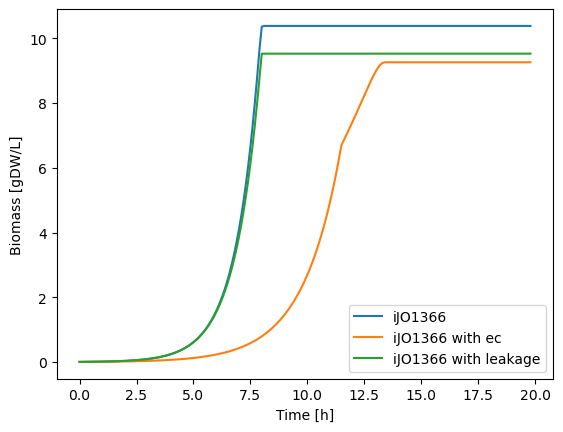

In [9]:
fig, ax = plt.subplots(1)
df = pd.DataFrame()
df['iJO1366'] = D1.biomass_df['Ecoli']
df['iJO1366 with ec'] = D2.biomass_df['Ecoli']
df['iJO1366 with leakage'] = D3.biomass_df['Ecoli']
# df['iJO1366 with ec and leakage'] = D4.biomass_df['Ecoli']
df.index = D3.biomass_df['Time']
df.plot(ax=ax)
ax.set_xlabel('Time [h]')
ax.set_ylabel('Biomass [gDW/L]')

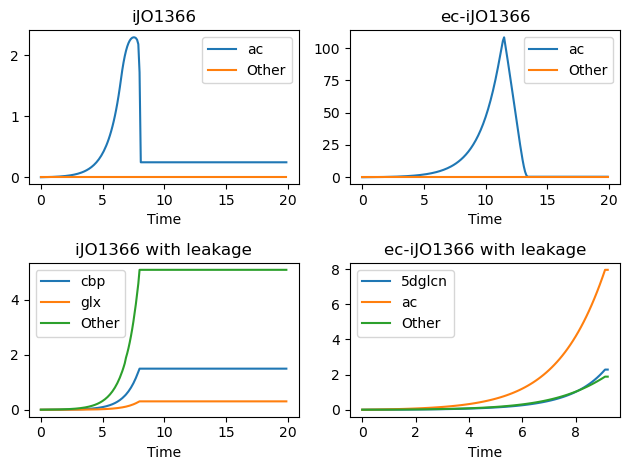

In [10]:
fig, axes = plt.subplots(2,2)

axes = axes.flatten()
labels = [
    'iJO1366',
    'ec-iJO1366',
    'iJO1366 with leakage',
    'ec-iJO1366 with leakage'
]
for i, D in enumerate([D1, D2, D3, D4]):
    
    cdf1 = D.medium.get_concentrations_df()
    cdf1.set_index('Time', inplace = True)
    cdf1.drop(columns=list(cdf1.columns[cdf1.max()==1000])+['Timepoint'], inplace=True)
    cdf1.columns = [x[:-2] for x in cdf1.columns]
    other_columns = cdf1.columns[cdf1.sum()/cdf1.sum().sum() < 0.001]
    cdf1['Other'] = cdf1.loc[:, other_columns].sum(axis = 1)
    cdf1.drop(columns=other_columns, inplace = True)
    cdf1.drop(columns=['co2', 'glc__D', 'hco3'], inplace=True, errors = 'ignore')
    
    cdf1.plot(ax = axes[i])
    axes[i].set_title(labels[i])
    plt.tight_layout()

In [14]:
cdf1.drop?

Signature:
cdf1.drop(
    labels=None,
    axis: 'Axis' = 0,
    index=None,
    columns=None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'str' = 'raise',
)
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by specifying directly index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the `user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list-like
    Alternative to specifying axis (``labels, axis=0``
    is equivalent to ``index=labels``).
columns 

In [43]:
cdf1.max()

10fthf_e        4.274886e-06
13dpg_e         7.920005e-04
1ddecg3p_e      1.690529e-05
1hdec9eg3p_e    1.337801e-05
1hdecg3p_e      1.099549e-05
                    ...     
utp_e           8.272369e-05
val__L_e        9.259139e-07
xan_e           2.968411e-07
xmp_e           2.469601e-07
xu5p__D_e       7.082279e-04
Length: 233, dtype: float64

In [69]:
# solution = model.optimize()
# carbon_uptake = {}
# for r in model.exchanges:
#     flux = solution.fluxes[r.id]
#     if flux < 0:
#         m = r.metabolites.popitem()[0]
#         try:
#             Nc = m.elements['C']
#         except KeyError:
#             Nc = 0
#         else:
#             carbon_uptake[r.id] = [-flux * Nc, Nc, flux]
        
# cu = pd.DataFrame(carbon_uptake).T
# cu.columns = ['C flux', 'Nc', 'Flux']
# cu.sort_values(by='C flux', ascending = False)
# reduction = 0.1*cu['C flux'].sum()
# new_lower_bounds = {}
# for r_id, row in cu.iterrows():
#     if row['C flux'] > reduction:
#         new_lower_bounds[r_id] = -(row['C flux']-reduction)/row['Nc']
        
# with model as M:
#     for key, value in new_lower_bounds.items():
#         M.reactions.get_by_id(key).lower_bound = value
#     reduced_solution = M.slim_optimize()

In [70]:
m = D.models['Ecoli']

In [ ]:
m.Vmax_dict

In [2]:
# model = cobra.io.read_sbml_model('../../models/e_coli/momentiJO1366.xml')
model = cobra.io.read_sbml_model('../../../models/e_coli/iJO1366.xml')

# model = cobra.io.read_sbml_model('../../../models/e_coli/iJR904.xml')
# model = cobra.io.read_sbml_model('../../models/e_coli/e_coli_core.xml')

model.solver = 'gurobi'

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-26


In [3]:
# solution = cobra.flux_analysis.pfba(model)

In [4]:
# model.reactions.DHAPT.knock_out()
# model.reactions.THRA.knock_out()
# model.reactions.THRA2.knock_out()
# model.reactions.F6PA.knock_out()

In [5]:
# Initial conditions is 0.013 gDW/L (in total)
model_name = 'Ecoli'
model_name_dict = {model_name: [model, 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 4)
D = FBA_leak.dFBA(iterations = 30, dt = 0.2, method = "FBA_with_leakage", store_exchanges_flag = False)#(, pfba_fraction = 0.95)
D.add_models(model_name_dict)

##### Lekage
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmp8q5mw8tt.lp
Reading time = 0.01 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


In [ ]:
# Set Km and vMax
D.models[model_name].set_km("glc__D_e", 1)
D.models[model_name].set_Vmax("glc__D_e", 10)



D.medium.define_initial_conditions({"glc__D_e": glucose_mM})
# D.medium.set_store_concentrations(["glc__D_e", "nh3_e"])

D.run()
print(D.biomass_df)

In [7]:
D.biomass_df

,Timepoint,Time,Ecoli
0,0,0.0,0.006000
1,1,0.2,0.007173
2,2,0.4,0.007173
3,3,0.6,0.007173
4,4,0.8,0.007173
5,5,1.0,0.007173
6,6,1.2,0.007173
7,7,1.4,0.007173
8,8,1.6,0.007173
9,9,1.8,0.007173


# Make auxotrophs
Using data from Mee et al., 2014 https://www.pnas.org/doi/epdf/10.1073/pnas.1405641111
R: argA,
C: cysE,
G: glyA,
H: hisB,
I: ilvA,
L: leuB,
K: lysA,
M: metA,
F: pheA,
P: proA,
S: serA,
T: thrC,
W: trpC,
Y: tyrA

In [4]:
KO_strain_dict = {
'R': 'argA',
'C': 'cysE',
'G': 'glyA',
'H': 'hisB',
'I': 'ilvA',
'L': 'leuB',
'K': 'lysA',
'M': 'metA',
'F': 'pheA',
'P': 'proA',
'S': 'serA',
'T': 'thrC',
'W': 'trpC',
'Y': 'tyrA'
}

In [2]:
# model = cobra.io.read_sbml_model('../../models/e_coli/iJR904.xml')
model = cobra.io.read_sbml_model('../../models/e_coli/iJO1366.xml')
# model = cobra.io.read_sbml_model('../../models/e_coli/e_coli_core.xml')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-26


In [5]:
folder = Path('../../models/e_coli/ko/')


model.solver = 'gurobi'
model_dict = {}
for key, gene_name in KO_strain_dict.items():
    with model as M:
        genes = [g for g in M.genes if g.name == gene_name]
        rxns = cobra.manipulation.knock_out_model_genes(M, genes)
        if key == 'I':
            # According to the model, tdcB can perform the same function, but we assume this reaction is knocked out anyway here
            M.reactions.THRD_L.bounds = (0,0)
        if key =='G':
            M.reactions.GLYAT.bounds = (0,1000)
            M.reactions.THRA.bounds = (0,0)
            M.reactions.THRA2.bounds = (0,0)
        if key =='P':
            # model.reactions.NACODA.bounds = (0,0)
            M.reactions.P5CR.bounds = (0,0)
        if key =='S':
            M.reactions.GHMT2r.bounds = (0,1000)
        if key =='T':
            M.reactions.THRA.bounds = (0,1000)
        print(key, genes[0], M.slim_optimize())
        # print(M.metabolites.ser__L_c.summary())
        cobra.io.write_sbml_model(M, folder/'{0}.xml'.format(key))
        model_dict[key] = M

R b2818 0.0
C b3607 0.0
G b2551 0.0
H b2022 0.0
I b3772 0.0
L b0073 0.0
K b2838 0.0
M b4013 0.0
F b2599 0.0
P b0243 0.0
S b2913 0.0
T b0004 0.0
W b1262 0.0
Y b2600 0.0


In [28]:
model.optimize()
print(cobra.flux_analysis.pfba(model))
print(model.summary())

<Solution 699.022 at 0x7fd179c638b0>
Objective
1.0 BIOMASS_Ec_iJO1366_core_53p95M = 0.9823718127269754

Uptake
------
Metabolite     Reaction      Flux  C-Number  C-Flux
     ca2_e     EX_ca2_e  0.005113         0   0.00%
      cl_e      EX_cl_e  0.005113         0   0.00%
 cobalt2_e EX_cobalt2_e 2.456E-05         0   0.00%
     cu2_e     EX_cu2_e 0.0006965         0   0.00%
     fe2_e     EX_fe2_e   0.01578         0   0.00%
  glc__D_e  EX_glc__D_e        10         6 100.00%
       k_e       EX_k_e    0.1918         0   0.00%
     mg2_e     EX_mg2_e  0.008522         0   0.00%
     mn2_e     EX_mn2_e 0.0006788         0   0.00%
    mobd_e    EX_mobd_e 0.0001267         0   0.00%
     nh4_e     EX_nh4_e     10.61         0   0.00%
     ni2_e     EX_ni2_e 0.0003173         0   0.00%
      o2_e      EX_o2_e     17.58         0   0.00%
      pi_e      EX_pi_e    0.9476         0   0.00%
     so4_e     EX_so4_e    0.2478         0   0.00%
     zn2_e     EX_zn2_e  0.000335         0   0.00

In [17]:
s = cobra.flux_analysis.pfba(model)

In [20]:
s

,fluxes,reduced_costs
EX_cm_e,0.000000,-2.0
EX_cmp_e,0.000000,178.2
EX_co2_e,19.675223,-2.0
EX_cobalt2_e,-0.000025,2.0
DM_4crsol_c,0.000219,-2.0
...,...,...
RNDR4,0.000000,-2.0
RNDR4b,0.000000,-2.0
RNTR1c2,0.025705,-2.0
RNTR2c2,0.026541,-2.0


# Simulate auxotrophs

In [6]:
model_name = 'Ecoli'
model_name_dict = {model_name: [model_dict['I'], 0.006]}

glucose_mM = utils.convert_gL_to_mM("C6H12O6", 4)
D = FBA_leak.dFBA(iterations = 3, dt = 0.1, method = "FBA_with_leakage", store_exchanges_flag = False)#(, pfba_fraction = 0.95)
D.add_models(model_name_dict)
# Set Km and vMax
D.models[model_name].set_km("glc__D_e", 1)
D.models[model_name].set_Vmax("glc__D_e", 10)



D.medium.define_initial_conditions({"glc__D_e": glucose_mM, "ile__L_e": 1})
D.run()
print(D.biomass_df)

##### Lekage
Read LP format model from file /var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/tmpoc1bkvlp.lp
Reading time = 0.00 seconds
: 761 rows, 2150 columns, 9006 nonzeros
dFBA simulation took 10 seconds
   Timepoint  Time     Ecoli
0          0   0.0  0.006000
1          1   0.1  0.006543


In [22]:
D.concentrations_df[['glc__D_e', 'ile__L_e']]

,glc__D_e,ile__L_e
0,22.202994,1.000000
1,22.196454,0.999836
2,22.189321,0.999658


In [10]:
for x in D.concentrations_df.columns:
    m = model.metabolites.get_by_id(x.replace("_e", "_c"))
    print(m.id, m.formula_weight, D.concentrations_df[x].max())

10fthf_c 471.42344 5.716009444975999e-07
13dpg_c 262.005382 1.0486222312436954e-05
1pyr5c_c 112.10664 4.731233673722961e-06
23dhdp_c 167.1189 3.727553324274676e-06
23dhmb_c 133.12256 5.010496238288017e-06
25aics_c 450.251561 1.3022634009434882e-06
26dap_LL_c 190.19706 2.925990038853849e-06
2cpr5p_c 346.206681 1.213939193873706e-06
2dda7p_c 285.12206100000003 3.2569500418461468e-06
2dr1p_c 212.09452100000001 3.892126247839106e-06
2dr5p_c 212.09452100000001 3.892126247839044e-06
2ippm_c 156.13602 3.233828574374865e-06
2pg_c 183.033421 1.206470536637243e-05
34hpp_c 179.14948 2.0334649037058393e-06
3c2hmp_c 174.1513 3.2338285743755803e-06
3c3hmp_c 174.1513 3.2338285743756684e-06
3c4mop_c 172.13542 3.53137770839612e-06
3dhq_c 189.14276 3.3040578304744168e-06
3dhsk_c 171.12748 3.304057830475455e-06
3ig3p_c 285.189841 1.2224728030777829e-06
3mob_c 115.10728 5.010496238281086e-06
3pg_c 183.033421 1.206470536637695e-05
3php_c 181.017541 1.5357361845737776e-05
3psme_c 320.146221 1.87912485007650

KeyError: 'Timepoint'

In [29]:
print(D.concentrations_df.max().sort_values())

u23ga_e         1.804664e-07
lipidX_e        2.295764e-07
ugmda_e         2.617167e-07
peptido_EC_e    2.651231e-07
u3aga_e         3.111130e-07
                    ...     
na1_e           1.000000e+03
nh4_e           1.000000e+03
o2_e            1.000000e+03
btn_e           1.000000e+03
pi_e            1.000000e+03
Length: 198, dtype: float64


In [ ]:
[x for x in D.concentrations_df.columns if D]

In [6]:
r = model.reactions.EX_12ppd__R_e

In [15]:
r.metabolites.popitem()[0].id

'12ppd__R_e'

# Yield of AA

In [49]:
model.reactions.BIOMASS_Ecoli_core_w_GAM

Reaction identifier,BIOMASS_Ecoli_core_w_GAM
Name,Biomass Objective Function with GAM
Memory address,0x7fe581d94880
Stoichiometry,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c... 1.496 3-Phospho-D-glycerate + 3.7478 Acetyl-CoA + 59.81 ATP C10H12N5O13P3 + 0.361 D-Erythrose 4-phosphate + 0.0709 D-Fructose 6-phosphate + 0.129 Glyceraldehyde 3-phosphate + 0.205 D-Glucose...
GPR,
Lower bound,0.0
Upper bound,1000.0
